# Sprint 3

## Machine Learning - Scratch Linear Regression

### [Problem 1-5] Implement ScratchLinearRegression

In [1]:
import numpy as np
import pandas as pd

In [2]:
class ScratchLinearRegression():
    """
    Scratch implementation of linear regression
    
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    
    Attributes
    ----------
    self.coef_ : ndarray, shape (n_features,)
      Parameters
    self.loss : ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : ndarray, shape (self.iter,)
      Record loss on validation data
    """
    
    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        # Bias term
        self.bias = 0
        self.theta = None
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn linear regression. If validation data is entered, 
        the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        y : ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : ndarray, shape (n_samples,)
            Correct value of verification data
        """
        n_samples = X.shape[0]
        n_features = X.shape[1]
        
        if not self.no_bias:
            # Append bias column to X
            X = np.hstack([np.ones([n_samples, 1]), X])
        
        # Prepare theta for hypotheis function
        self.theta = np.random.rand(n_features + (1 - self.no_bias))
        
        for i in range(self.iter):
            y_hyp = self._linear_hypothesis(X)
            self.theta = self._gradient_descent(X, y, y_hyp)
            self.loss[i] = self._loss_function(y_hyp, y)
            
            if X_val is not None and y_val is not None:
                y_predict = self.predict(X_val)
                self.val_loss[i] = self._loss_function(y_predict, y_val)
                
        if self.verbose:
            #Output learning process when verbose is set to True
            print("Loss: {}".format(self.loss))
            print("Val_loss: {}".format(self.val_loss))
        pass
        
    def predict(self, X):
        """
        Estimate using linear regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            ndarray, shape (n_samples, 1)
            Estimated result by linear regression
        """
        if not self.no_bias:
            n_samples = X.shape[0]
            X = np.hstack([np.ones([n_samples, 1]), X])
        return X @ self.theta
    
    def _linear_hypothesis(self, X):
        """
        Compute a linear hypothetical function
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
          Training data
        Returns
        -------
          ndarray, shape (n_samples, 1)
          Estimated result by linear hypothetical function
        """
        y_hyp = np.dot(X, self.theta.T)
        return y_hyp
    
    def _gradient_descent(self, X, y, y_hyp):
        """
        Update new theta j in the steepest decent method
        Parameters
        ----------
        X: ndarray, shape (n_samples, n_features)
            Training data
        y: ndarray, shape (n_samples,)
            Correct answer value of training data
        y_hyp: ndarray, shape (n_samples, 1)
        Returns
        -------
        update_theta: ndarray, shape (n_features, 1)
          New theta value
        """
        n_samples = X.shape[0]
        update_theta = self.theta - (self.lr * np.dot((y_hyp - y), X) / n_samples)
        return update_theta
    
    def _loss_function(self, y_pred, y):
        """
        Calculation of objective function.
        Parameters
        ----------
        y_pred : The following forms of ndarray, shape (n_samples,)
          Estimated value
        y : The following forms of ndarray, shape (n_samples,)
          Correct answer value
        Returns
        ----------
        loss: numpy.float
          Result of the loss function
        """
        loss = np.mean((y_pred - y) ** 2)
        return loss
        

def MSE(y_pred, y):
    """
    Calculation of mean square error
    Parameters
    ----------
    y_pred : The following forms of ndarray, shape (n_samples,)
      Estimated value
    y : The following forms of ndarray, shape (n_samples,)
      Correct answer value
    Returns
    ----------
    mse : numpy.float
      Mean squared error
    """
    n_samples = y.shape[0]
    mse = np.mean((y_pred - y) ** 2)
    return mse

#### [Problem 1] Hypothetical function
Implemented in `def _linear_hypothesis(self, X)`

#### [Problem 2] Steepest descent
Implemented in `def _gradient_descent(self, X, y, y_hyp)`

#### [Problem 3] Estimated
Implemented in `def fit(self, X, y, X_val=None, y_val=None)`, `def predict(self, X)`

#### [Problem 4] Mean squared error
Implemented in `def MSE(y_pred, y)` (outside the class)

#### [Problem 5] Objective function
Implemented in `def _loss_function(self, y_pred, y)`

Now we will test our Scratch Linear Regression which has just been constructed.

In [3]:
X = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8],
    [9, 10]
])
X.shape

(5, 2)

In [4]:
# Let y = 2x1 + 1x2
y = np.array([4, 10, 16, 22, 28])
y.shape

(5,)

In [5]:
slr = ScratchLinearRegression(100, 0.01, False, True)

In [6]:
theta = slr.fit(X, y)

Loss: [168.62159052   8.96841148   1.01911358   0.61995352   0.59657634
   0.59192308   0.58822321   0.58459218   0.58098585   0.57740187
   0.57384001   0.57030012   0.56678207   0.56328572   0.55981094
   0.55635759   0.55292555   0.54951468   0.54612485   0.54275593
   0.53940779   0.5360803    0.53277335   0.52948679   0.52622051
   0.52297437   0.51974826   0.51654205   0.51335562   0.51018885
   0.50704161   0.50391379   0.50080526   0.4977159    0.49464561
   0.49159425   0.48856172   0.48554789   0.48255266   0.4795759
   0.47661751   0.47367736   0.47075535   0.46785137   0.4649653
   0.46209704   0.45924647   0.45641348   0.45359797   0.45079983
   0.44801894   0.44525522   0.44250854   0.43977881   0.43706591
   0.43436975   0.43169022   0.42902722   0.42638065   0.42375041
   0.42113639   0.41853849   0.41595662   0.41339068   0.41084057
   0.40830619   0.40578744   0.40328423   0.40079646   0.39832404
   0.39586687   0.39342486   0.39099791   0.38858593   0.38618883
   0.3

In [7]:
slr_predict = slr.predict(X)
slr_predict

array([ 4.98226055, 10.62023442, 16.2582083 , 21.89618217, 27.53415604])

In [8]:
MSE(y, slr_predict)

0.32879735992376286

### [Problem 6] Learning and estimation

In [9]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
X = df[['GrLivArea']].values
y = df['SalePrice'].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1095, 1) (365, 1) (1095,) (365,)


In [12]:
X[:5]

array([[1710],
       [1262],
       [1786],
       [1717],
       [2198]], dtype=int64)

In [13]:
y[:5]

array([208500, 181500, 223500, 140000, 250000], dtype=int64)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
slr_house = ScratchLinearRegression()
slr_house.fit(X_train_scaled, y_train, X_test_scaled, y_test)
y_house_predict = slr_house.predict(X_test_scaled)

pd.DataFrame([y_house_predict, y_test])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,187579.79899,116533.545903,161884.554442,152990.046714,256759.303541,190874.061111,131028.299238,172865.42818,251488.484146,131138.107975,...,180222.613585,167155.373836,183407.066969,157162.778735,150793.871966,119168.9556,152001.768078,152550.811764,182528.59707,140691.468127
1,178000.00000,110000.000000,181000.000000,147500.000000,274970.000000,272000.000000,145000.000000,218000.00000,313000.000000,132000.000000,...,191000.000000,166000.000000,280000.000000,179200.000000,134450.000000,119000.0000,197000.000000,235000.000000,177000.00000,131400.000000


In [16]:
MSE(y_house_predict, y_test)

3363647840.5944686

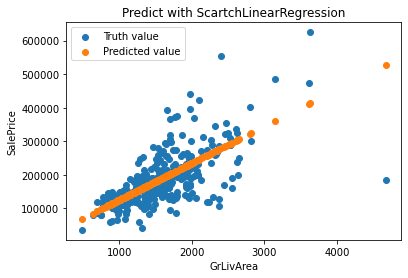

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Predict with ScartchLinearRegression')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test, y_test, label='Truth value')
plt.scatter(X_test, y_house_predict, label='Predicted value')
plt.legend()
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_predict = lr.predict(X_test_scaled)

pd.DataFrame([lr_predict, y_test], index=['Predict value', 'Truth value'])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
Predict value,187587.897351,116538.576986,161891.543463,152996.651733,256770.388587,190882.301695,131033.956102,172872.891278,251499.341636,131143.769581,...,180230.394315,167162.590415,183414.985181,157169.563903,150800.38217,119174.100462,152008.330429,152557.39782,182536.477356,140697.54218
Truth value,178000.000000,110000.000000,181000.000000,147500.000000,274970.000000,272000.000000,145000.000000,218000.000000,313000.000000,132000.000000,...,191000.000000,166000.000000,280000.000000,179200.000000,134450.00000,119000.000000,197000.000000,235000.00000,177000.000000,131400.00000


In [19]:
mean_squared_error(y_test, lr_predict)

3363711459.0612993

### [Problem 7] Learning curve plot

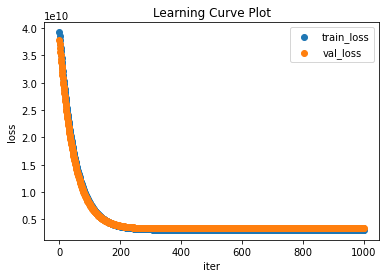

In [20]:
plt.title('Learning Curve Plot')
plt.xlabel('iter')
plt.ylabel('loss')
plt.scatter(range(slr_house.iter), slr_house.loss, label='train_loss')
plt.scatter(range(slr_house.iter), slr_house.val_loss, label='val_loss')
plt.legend()
plt.show()

### [Problem 8] (Advance task) Removal of bias term

In [21]:
slr_nobias = ScratchLinearRegression(no_bias=True)
slr_nobias.fit(X_train_scaled, y_train)
slr_nobias_predict = slr_nobias.predict(X_test_scaled)

pd.DataFrame([slr_nobias_predict, y_test], index=['Predict value', 'Truth value'])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
Predict value,6379.336094,-64666.917029,-19315.908466,-28210.416199,75558.840681,9673.598218,-50172.163687,-8335.034722,70288.021284,-50062.354949,...,-977.849314,-14045.089069,2206.604072,-24037.684176,-30406.590948,-62031.50733,-29198.694836,-28649.651149,1328.134172,-40508.994792
Truth value,178000.000000,110000.000000,181000.000000,147500.000000,274970.000000,272000.000000,145000.000000,218000.000000,313000.000000,132000.000000,...,191000.000000,166000.000000,280000.000000,179200.000000,134450.000000,119000.00000,197000.000000,235000.000000,177000.000000,131400.000000


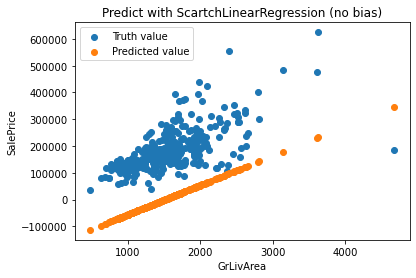

In [22]:
plt.title('Predict with ScartchLinearRegression (no bias)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test, y_test, label='Truth value')
plt.scatter(X_test, slr_nobias_predict, label='Predicted value')
plt.legend()
plt.show()

The bias term is used to allow models to represent patterns that do not pass through the origin. In this problem, when there is no bias term, the predicted sale price can be negative and most predicted values is smaller than expected values. The bias term now shifts the sale price up on y-axis.

### [Problem 9] (Advance task) Multidimensional feature quantity

In [23]:
X = df[['GrLivArea', 'YearBuilt']].values
y = df['SalePrice'].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1095, 2) (365, 2) (1095,) (365,)


In [25]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
slr_house = ScratchLinearRegression()
slr_house.fit(X_train_scaled, y_train, X_test_scaled, y_test)
y_house_predict = slr_house.predict(X_test_scaled)

pd.DataFrame([y_house_predict, y_test])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,132523.325497,231665.717596,98204.823401,204172.059249,118914.141831,172498.434785,233304.915344,133106.327622,80083.322018,129510.750454,...,115429.066703,73000.589486,206382.014911,204459.594476,175969.033397,190607.691957,133522.460535,144334.373872,218196.682415,236113.736471
1,107000.000000,240000.000000,78000.000000,172500.000000,110000.000000,152000.000000,130000.000000,156000.000000,100000.000000,76500.000000,...,105000.000000,61000.000000,146000.000000,202500.000000,155000.000000,197000.000000,122000.000000,98600.000000,264132.000000,255500.000000


In [27]:
MSE(y_house_predict, y_test)

1686159888.6098633

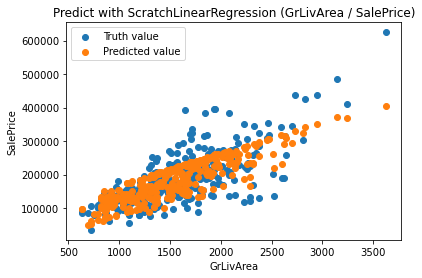

In [28]:
plt.title('Predict with ScratchLinearRegression (GrLivArea / SalePrice)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test[:, 0], y_test, label='Truth value')
plt.scatter(X_test[:, 0], y_house_predict, label='Predicted value')
plt.legend()
plt.show()

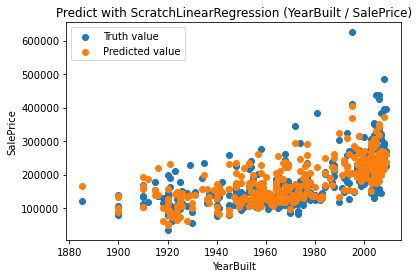

In [29]:
plt.title('Predict with ScratchLinearRegression (YearBuilt / SalePrice)')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.scatter(X_test[:, 1], y_test, label='Truth value')
plt.scatter(X_test[:, 1], y_house_predict, label='Predicted value')
plt.legend()
plt.show()

### [Problem 10] (Advance task) Derivation of update formula

Prove that:

$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]$

We have 

$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta)$

with 

$ J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2 $.

Hence, 

$\frac{\partial J}{\partial x} = \frac{1}{2m} \frac{\partial  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2}{\partial x}$

$\frac{\partial J}{\partial x} = \frac{1}{2m} \times 2 \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \frac{\partial (h_\theta(x^{(i)}) - y^{(i)})}{\partial \theta_j}$

$\frac{\partial J}{\partial x} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \frac{\partial (\theta_j x_j^{(i)} - y^{(i)})}{\partial \theta_j}$

$\frac{\partial J}{\partial x} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$.

Therefore, $\theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta) = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]$.